# Análisis de compañías del S&P 500

En el presente informe se toma en cuenta el indice S&P500.Este índice se basa en la capitalización bursátil de 500 grandes empresas que poseen acciones que cotizan en las bolsas NYSE o NASDAQ, y captura aproximadamente el 80% de toda la capitalización de mercado.
Se realiza un análisis sobre los distintas empresas a lo largo del tiempo para comprender mejor el mercado, y poder tomar decisiones en base a nuestras recomendaciones

### Se importan las librerías a utilizar

In [1]:
import pandas as pd
import requests as r
import yfinance as yf
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import mean_historical_return

### Se obtiene la lista de los S&P500 de Wikipedia https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
pagina= r.get(url).content
lista_datos = pd.read_html(pagina)
type(lista_datos)
datos_wiki=lista_datos[0]


In [3]:
datos_wiki.head(10)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
5,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
6,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
7,ADM,ADM,reports,Consumer Staples,Agricultural Products,"Chicago, Illinois",1981-07-29,7084,1902
8,ADBE,Adobe Inc.,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
9,ADP,ADP,reports,Information Technology,Data Processing & Outsourced Services,"Roseland, New Jersey",1981-03-31,8670,1949


In [4]:
df_simbolos=datos_wiki.iloc[:,[0,1,3,4]]

Se conservan los datos de las columnas relevantes para este informe

In [5]:
print(df_simbolos)

    Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4     ABMD               Abiomed             Health Care   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                      GICS Sub-Industry  
0              Industrial Conglomerates  
1                     Building Products  
2                 Health Care Equipment  
3                       Pharmaceuticals  
4                 Health Care Equipment  
..                         

In [6]:
type(df_simbolos['Symbol'])

pandas.core.series.Series

In [7]:
#df_simbolos['Symbol']=df_simbolos['Symbol'].replace('.','-') 
df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')      # Se reemplaza el '.' por '-' en la columna Symbol


C:\Users\Diana\AppData\Local\Temp\ipykernel_12712\3397331766.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')      # Se reemplaza el '.' por '-' en la columna Symbol
C:\Users\Diana\AppData\Local\Temp\ipykernel_12712\3397331766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')      # Se reemplaza el '.' por '-' en la columna Symbol


In [8]:
df_simbolos.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
5,ACN,Accenture,Information Technology,IT Consulting & Other Services
6,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
7,ADM,ADM,Consumer Staples,Agricultural Products
8,ADBE,Adobe Inc.,Information Technology,Application Software
9,ADP,ADP,Information Technology,Data Processing & Outsourced Services


In [9]:
#Se obtiene la lista de simbolos que se va a analizar
simbolos= df_simbolos['Symbol'].tolist()

In [10]:

print(simbolos)

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'D

In [11]:
#Se descarga los datos de la API yahoo Finance usanado la libreria yfinance
df_data = yf.download(simbolos,start='2000-01-01',end='2020-12-31',group_by="ticker", threads=3)
df_data



[*********************100%***********************]  503 of 503 completed

3 Failed downloads:
- OGN: Data doesn't exist for startDate = 946702800, endDate = 1609390800
- CEG: Data doesn't exist for startDate = 946702800, endDate = 1609390800
- PSX: No data found for this date range, symbol may be delisted


ALGN                                                     ORCL  \
               Open     High      Low    Close Adj Close     Volume     Open   
Date                                                                           
2001-01-30  18.1250  18.1875  16.2500  16.8750   16.8750   812300.0  30.7500   
2001-01-31  17.1250  17.1875  13.4375  13.5000   13.5000  1212700.0  30.5625   
2001-02-01  13.1250  14.3750  13.0000  14.1875   14.1875   669100.0  29.2500   
2001-02-02  14.0000  14.5625  13.7500  14.1250   14.1250   775000.0  29.9375   
2001-02-05  14.4375  14.5000  13.8750  14.1250   14.1250   489400.0  27.5000   
...             ...      ...      ...      ...       ...        ...      ...   
2001-01-25      NaN      NaN      NaN      NaN       NaN        NaN  30.5625   
2001-01-26      NaN      NaN      NaN      NaN       NaN        NaN  29.6250   
2001-01-29      NaN      NaN      NaN      NaN       NaN        NaN  30.1875   
2001-09-12      NaN      NaN      NaN      NaN       NaN        NaN      NaN   
2020-12-31      NaN      NaN      NaN      NaN       NaN        NaN      NaN   

                                       ...        UNH                        \
               High      Low    Close  ...        Low      Close  Adj Close   
Date                                   ...                                    
2001-01-30  31.5000  30.1250  30.3125  ...  14.160000  14.270000  11.768106   
2001-01-31  30.8125  29.0625  29.1250  ...  13.730000  14.102500  11.629971   
2001-02-01  30.6875  29.1250  30.0625  ...  13.975000  14.185000  11.698007   
2001-02-02  30.0625  27.6875  27.7500  ...  14.962500  15.275000  12.596906   
2001-02-05  28.5000  26.5000  27.5000  ...  15.165000  15.602500  12.866985   
...             ...      ...      ...  ...        ...        ...        ...   
2001-01-25  30.7500  29.5000  29.9375  ...  14.828125  15.125000  12.473200   
2001-01-26  30.5000  28.7500  30.3750  ...  14.828125  14.953125  12.331460   
2001-01-29  31.1250  29.8125  30.4375  ...  14.655000  14.690000  12.114472   
2001-09-12      NaN      NaN      NaN  ...        NaN        NaN        NaN   
2020-12-31      NaN      NaN      NaN  ...        NaN        NaN        NaN   

                        PSX                                  
                Volume Open High Low Close Adj Close Volume  
Date                                                         
2001-01-30   8954000.0  NaN  NaN NaN   NaN       NaN    NaN  
2001-01-31   7565600.0  NaN  NaN NaN   NaN       NaN    NaN  
2001-02-01   8748000.0  NaN  NaN NaN   NaN       NaN    NaN  
2001-02-02  18066800.0  NaN  NaN NaN   NaN       NaN    NaN  
2001-02-05   9640000.0  NaN  NaN NaN   NaN       NaN    NaN  
...                ...  ...  ...  ..   ...       ...    ...  
2001-01-25   8775200.0  NaN  NaN NaN   NaN       NaN    NaN  
2001-01-26   4901600.0  NaN  NaN NaN   NaN       NaN    NaN  
2001-01-29   4058800.0  NaN  NaN NaN   NaN       NaN    NaN  
2001-09-12         NaN  NaN  NaN NaN   NaN       NaN    NaN  
2020-12-31         NaN  NaN  NaN NaN   NaN       NaN    NaN  

[5285 rows x 3018 columns]

Se construye un dataframe por cada activo en el cual se calcularan los indicadores necesarios.
Luego cada dataframe por activo sera almacenado en una lista par posteriomente concatenarlos en un solo DataFrame Global

In [12]:

df_data.columns
tickers=df_data.columns.get_level_values(0)
tickers=tickers.unique()
list_tickers=[]
for i in tickers:
    df_ticker=df_data.loc[:,i]
    df_ticker.reset_index(inplace=True)
    df_ticker=df_ticker.sort_values('Date')
    df_ticker=df_ticker.assign(Ticker=i)
    #Se calcula el Retorno GAP y se agrega esa columna
    df_ticker= df_ticker.assign(GAP_Return=lambda x: np.log(x['Open']/x['Close'].shift(1)).fillna(0))
    #Se calcula el Retorno Intradiario y se agrega esa columna
    df_ticker= df_ticker.assign(Intradaily_Return=lambda x: np.log(x['Close']/x['Open']).fillna(0))
    #Se calcula la variacion y se agrega esa columna
    df_ticker=df_ticker.assign(Variation= lambda x: x['Adj Close'].pct_change())
    #Se calcula la volatibilidad y se agrega esa columna
    df_ticker= df_ticker.assign(Volatility= lambda x: x['Variation'].rolling(250).std()*100*(250)**0.5 )        
    list_tickers.append(df_ticker)

df_global=pd.concat(list_tickers)

df_global=df_global.assign(WeekDay=lambda x:x['Date'].dt.strftime('%A'))    #para conocer el dia de la semana
df_global=df_global.assign(Year_Month=lambda x:x['Date'].dt.strftime('%Y-%m'))      #para conocer el año y mes correspondiente


In [13]:
df_global

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GAP_Return,Intradaily_Return,Variation,Volatility,WeekDay,Year_Month
5012,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,ALGN,0.0,0.0,NaN,NaN,Monday,2000-01
5013,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,ALGN,0.0,0.0,NaN,NaN,Tuesday,2000-01
5014,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,ALGN,0.0,0.0,NaN,NaN,Wednesday,2000-01
5015,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,ALGN,0.0,0.0,NaN,NaN,Thursday,2000-01
5016,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,ALGN,0.0,0.0,NaN,NaN,Friday,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5008,2020-12-24,NaN,NaN,NaN,NaN,NaN,NaN,PSX,0.0,0.0,NaN,NaN,Thursday,2020-12
5009,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,PSX,0.0,0.0,NaN,NaN,Monday,2020-12
5010,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,PSX,0.0,0.0,NaN,NaN,Tuesday,2020-12
5011,2020-12-30,NaN,NaN,NaN,NaN,NaN,NaN,PSX,0.0,0.0,NaN,NaN,Wednesday,2020-12


In [14]:
#Se verifica que todos los REtornos GAPS inicien en cero
verificar_inicio_cero=df_global.loc[df_global.Date=='2000-01-03','GAP_Return'].sum()
verificar_inicio_cero

0.0

# Análisis del mejor día para invertir usando el rendimiento gap.
<div class="alert alert-block alert-info">
<b>
Gap: Diferencia relativa entre precios Close del día anterior y el actual (escala logarítmica).
Simula una compra al cierre de un día y venta al cierre del día siguiente.
Las distribuciones para los rendimientos son similares, por lo que se infiere que el día para la inversión no es una variable relevante en el rendimiento gap.


Se elabora un dataframe con las columnas  WeekDay y GAP_Return

In [15]:
df_retorno_gaps= pd.DataFrame()

df_retorno_gaps=df_global[['WeekDay','GAP_Return']]
df_retorno_gaps

,WeekDay,GAP_Return
5012,Monday,0.0
5013,Tuesday,0.0
5014,Wednesday,0.0
5015,Thursday,0.0
5016,Friday,0.0
...,...,...
5008,Thursday,0.0
5009,Monday,0.0
5010,Tuesday,0.0
5011,Wednesday,0.0


In [16]:
df_Retorno_Gaps = df_global[['WeekDay','Ticker','GAP_Return']].groupby([df_global['WeekDay'],df_global['Ticker']]).sum()
df_Retorno_Gaps.reset_index(inplace=True)
df_Retorno_Gaps

,WeekDay,Ticker,GAP_Return
0,Friday,A,-0.360434
1,Friday,AAL,0.505713
2,Friday,AAP,0.391958
3,Friday,AAPL,-0.547687
4,Friday,ABBV,0.287896
...,...,...,...
2510,Wednesday,YUM,-0.425206
2511,Wednesday,ZBH,-0.142592
2512,Wednesday,ZBRA,-0.727324
2513,Wednesday,ZION,0.001458


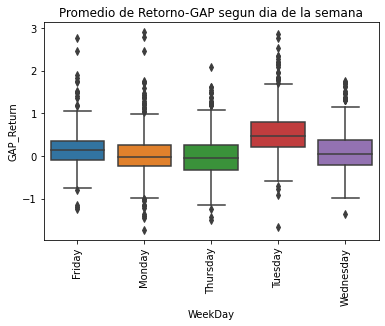

In [17]:
sns.boxplot(data =df_Retorno_Gaps,x='WeekDay',y='GAP_Return')
plt.xticks(rotation=90)
plt.title('Promedio de Retorno-GAP segun dia de la semana')  
plt.show()

In [18]:
dia_inversion_gap=df_retorno_gaps.groupby(['WeekDay']).mean()
#dia_inversion.reset_index(inplace=True)
dia_inversion_gap

,GAP_Return
WeekDay,
Friday,0.000155
Monday,0.000029
Thursday,-0.000007
Tuesday,0.000501
Wednesday,0.000097


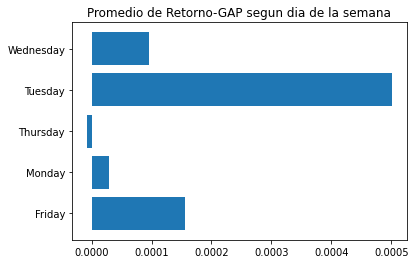

In [19]:
plt.figure()                                #Figura 
x_values1 = dia_inversion_gap.index.tolist()
y_values1 = dia_inversion_gap.GAP_Return.tolist()

plt.barh(x_values1, y_values1)               #El gráfico
plt.title('Promedio de Retorno-GAP segun dia de la semana')              #El título
plt.show()

<Figure size 720x720 with 0 Axes>

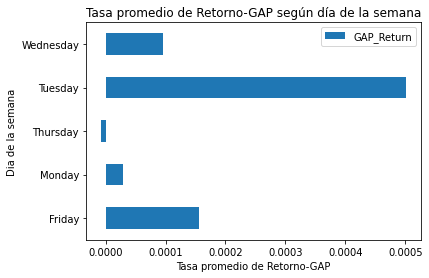

In [20]:
plt.figure(figsize=(10,10))
dia_inversion_gap.plot.barh()
plt.title('Tasa promedio de Retorno-GAP según día de la semana')
plt.xlabel('Tasa promedio de Retorno-GAP')
plt.ylabel('Dia de la semana')
plt.show()

# Análisis del mejor día para invertir usando el rendimiento intradiario.
<b>Intra: Considera la diferencia entre el precio de cierre y el precio de apertura (escala logaritmica).

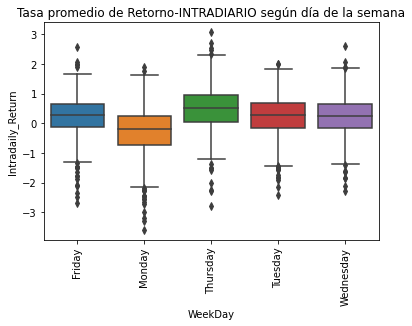

In [21]:
df_Retorno_Intra = df_global[['WeekDay','Ticker','Intradaily_Return']].groupby([df_global['WeekDay'],df_global['Ticker']]).sum()
df_Retorno_Intra.reset_index(inplace=True)
sns.boxplot(data =df_Retorno_Intra,x='WeekDay',y='Intradaily_Return')
plt.xticks(rotation=90)
plt.title('Tasa promedio de Retorno-INTRADIARIO según día de la semana')
plt.show()

In [22]:
df_retorno_intra= pd.DataFrame()
df_retorno_intra=df_global[['WeekDay','Intradaily_Return']]
df_retorno_intra

,WeekDay,Intradaily_Return
5012,Monday,0.0
5013,Tuesday,0.0
5014,Wednesday,0.0
5015,Thursday,0.0
5016,Friday,0.0
...,...,...
5008,Thursday,0.0
5009,Monday,0.0
5010,Tuesday,0.0
5011,Wednesday,0.0


In [23]:
dia_inversion_intra=df_retorno_intra.groupby(['WeekDay']).mean()
dia_inversion_intra

,Intradaily_Return
WeekDay,
Friday,0.000214
Monday,-0.000296
Thursday,0.000457
Tuesday,0.000232
Wednesday,0.000206


<Figure size 720x720 with 0 Axes>

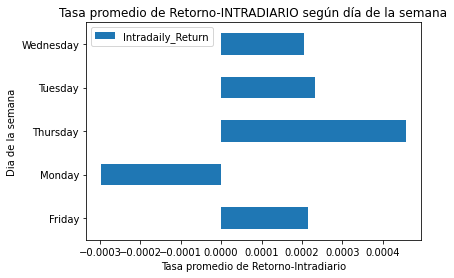

In [24]:
plt.figure(figsize=(10,10))
dia_inversion_intra.plot.barh()
plt.title('Tasa promedio de Retorno-INTRADIARIO según día de la semana')
plt.xlabel('Tasa promedio de Retorno-Intradiario')
plt.ylabel('Dia de la semana')
plt.show()

In [25]:
df_simbolos=df_simbolos.rename({'Symbol': 'Ticker'},axis=1)
df_simbolos


,Ticker,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment
501,ZION,Zions Bancorporation,Financials,Regional Banks


In [26]:

df_global_ind= df_global.merge(df_simbolos, on='Ticker', how='left')
df_global_ind

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GAP_Return,Intradaily_Return,Variation,Volatility,WeekDay,Year_Month,Security,GICS Sector,GICS Sub-Industry
0,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,ALGN,0.0,0.0,NaN,NaN,Monday,2000-01,Align Technology,Health Care,Health Care Supplies
1,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,ALGN,0.0,0.0,NaN,NaN,Tuesday,2000-01,Align Technology,Health Care,Health Care Supplies
2,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,ALGN,0.0,0.0,NaN,NaN,Wednesday,2000-01,Align Technology,Health Care,Health Care Supplies
3,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,ALGN,0.0,0.0,NaN,NaN,Thursday,2000-01,Align Technology,Health Care,Health Care Supplies
4,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,ALGN,0.0,0.0,NaN,NaN,Friday,2000-01,Align Technology,Health Care,Health Care Supplies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658350,2020-12-24,NaN,NaN,NaN,NaN,NaN,NaN,PSX,0.0,0.0,NaN,NaN,Thursday,2020-12,Phillips 66,Energy,Oil & Gas Refining & Marketing
2658351,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,PSX,0.0,0.0,NaN,NaN,Monday,2020-12,Phillips 66,Energy,Oil & Gas Refining & Marketing
2658352,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,PSX,0.0,0.0,NaN,NaN,Tuesday,2020-12,Phillips 66,Energy,Oil & Gas Refining & Marketing
2658353,2020-12-30,NaN,NaN,NaN,NaN,NaN,NaN,PSX,0.0,0.0,NaN,NaN,Wednesday,2020-12,Phillips 66,Energy,Oil & Gas Refining & Marketing


In [27]:
df_emp_r_gaps= pd.DataFrame()

df_emp_r_gaps=df_global_ind[['GICS Sector','GAP_Return']]
df_emp_r_gaps

,GICS Sector,GAP_Return
0,Health Care,0.0
1,Health Care,0.0
2,Health Care,0.0
3,Health Care,0.0
4,Health Care,0.0
...,...,...
2658350,Energy,0.0
2658351,Energy,0.0
2658352,Energy,0.0
2658353,Energy,0.0


In [28]:
df_emp_r_gaps =df_emp_r_gaps.groupby(['GICS Sector']).mean()
df_emp_r_gaps = df_emp_r_gaps.sort_values('GAP_Return',ascending=True)
df_emp_r_gaps

,GAP_Return
GICS Sector,
Consumer Staples,-0.000083
Utilities,0.000011
Real Estate,0.000054
Industrials,0.000118
Financials,0.000120
Health Care,0.000156
Information Technology,0.000169
Materials,0.000224
Communication Services,0.000226


<Figure size 720x720 with 0 Axes>

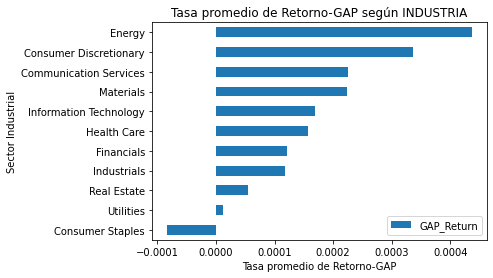

In [29]:
plt.figure(figsize=(10,10))
df_emp_r_gaps.plot.barh()
plt.title('Tasa promedio de Retorno-GAP según INDUSTRIA')
plt.xlabel('Tasa promedio de Retorno-GAP')
plt.ylabel('Sector Industrial')
plt.show()

In [30]:
df_emp_r_intra= pd.DataFrame()

df_emp_r_intra=df_global_ind[['GICS Sector','Intradaily_Return']]
df_emp_r_intra

,GICS Sector,Intradaily_Return
0,Health Care,0.0
1,Health Care,0.0
2,Health Care,0.0
3,Health Care,0.0
4,Health Care,0.0
...,...,...
2658350,Energy,0.0
2658351,Energy,0.0
2658352,Energy,0.0
2658353,Energy,0.0


In [31]:
df_emp_r_intra =df_emp_r_intra.groupby(['GICS Sector']).mean()
df_emp_r_intra = df_emp_r_intra.sort_values('Intradaily_Return',ascending=True)
df_emp_r_intra

,Intradaily_Return
GICS Sector,
Energy,-0.000298
Communication Services,0.000032
Materials,0.000050
Consumer Discretionary,0.000101
Financials,0.000120
Information Technology,0.000196
Utilities,0.000200
Real Estate,0.000206
Industrials,0.000242


<Figure size 720x720 with 0 Axes>

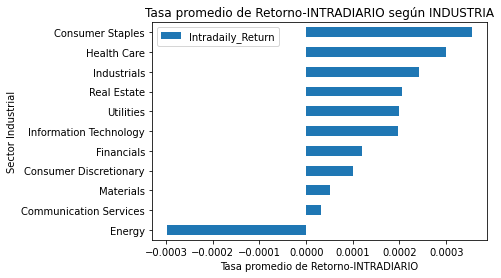

In [32]:
plt.figure(figsize=(10,10))
df_emp_r_intra.plot.barh()
plt.title('Tasa promedio de Retorno-INTRADIARIO según INDUSTRIA')
plt.xlabel('Tasa promedio de Retorno-INTRADIARIO')
plt.ylabel('Sector Industrial')
plt.show()

In [33]:
df_volatibilidades=pd.DataFrame
df_volatibilidades= df_global[['Year_Month','Volatility']]
df_volatibilidades = df_volatibilidades.sort_values('Volatility',ascending=False)
df_volatibilidades

,Year_Month,Volatility
2161,2009-09,214.222180
2160,2009-09,213.994105
2159,2009-09,213.990594
2164,2009-09,213.760677
2163,2009-09,213.593360
...,...,...
5008,2020-12,NaN
5009,2020-12,NaN
5010,2020-12,NaN
5011,2020-12,NaN


In [34]:
df_volatibilidades_por_periodo=df_volatibilidades.groupby(['Year_Month']).mean()
df_volatibilidades_por_periodo = df_volatibilidades_por_periodo.sort_values('Volatility',ascending=False)
df_volatibilidades_por_periodo

,Volatility
Year_Month,
2009-06,70.404259
2009-07,69.984871
2009-05,69.963379
2009-08,69.494805
2009-04,68.581947
...,...
2000-07,NaN
2000-08,NaN
2000-09,NaN


In [35]:
df_volatilidades_altas_periodos=df_volatibilidades_por_periodo.head(15)

In [36]:
df_volatilidades_altas_periodos

,Volatility
Year_Month,
2009-06,70.404259
2009-07,69.984871
2009-05,69.963379
2009-08,69.494805
2009-04,68.581947
2009-09,68.386642
2009-03,66.428753
2009-02,64.056832
2009-10,62.767798


<Figure size 720x720 with 0 Axes>

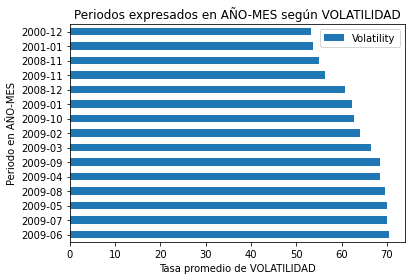

In [37]:
plt.figure(figsize=(10,10))
df_volatilidades_altas_periodos.plot.barh()
plt.title('Periodos expresados en AÑO-MES según VOLATILIDAD')
plt.xlabel('Tasa promedio de VOLATILIDAD')
plt.ylabel('Periodo en AÑO-MES')
plt.show()

In [38]:
df_data.columns
tickers=df_data.columns.get_level_values(0)
tickers=tickers.unique()

In [39]:
tickers

Index(['ALGN', 'ORCL', 'AMT', 'ZBH', 'ITW', 'BBWI', 'ROP', 'ALL', 'BIO', 'CPT',
       ...
       'MLM', 'GL', 'PM', 'VLO', 'FE', 'PTC', 'HON', 'T', 'UNH', 'PSX'],
      dtype='object', length=503)

In [40]:
df_TYL=df_data.loc[:,'TYL']
df_TYL.reset_index(inplace=True)

df_TYL.rename(columns={'Adj Close':'TYL'},inplace=True)
df_TYL.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)
df_TYL.set_index(['Date'],inplace=True)

#df_TYL=df_TYL['Adj Close']

df_TYL

C:\Users\Diana\AppData\Local\Temp\ipykernel_12712\2417216141.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TYL.rename(columns={'Adj Close':'TYL'},inplace=True)
C:\Users\Diana\AppData\Local\Temp\ipykernel_12712\2417216141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TYL.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)


,TYL
Date,
2001-01-30,1.9700
2001-01-31,1.7500
2001-02-01,1.7900
2001-02-02,1.7100
2001-02-05,1.9400
...,...
2001-01-25,2.0625
2001-01-26,1.8125
2001-01-29,1.7900


# Comprender el precio de cierre ajustado
Los valores de las acciones se expresan en términos del precio de cierre y el precio de cierre ajustado. El precio de cierre es el precio sin procesar, que es solo el valor en efectivo del último precio negociado antes del cierre del mercado. El precio de cierre ajustado tiene en cuenta cualquier cosa que pueda afectar el precio de las acciones después del cierre del mercado.

In [41]:
list_tickers=[]
df_empresas=pd.DataFrame
for i in tickers:
    df_AdjClose_tickers=df_data.loc[:,i]
    df_AdjClose_tickers.reset_index(inplace=True)
    df_AdjClose_tickers.rename(columns={'Adj Close':i},inplace=True)
    df_AdjClose_tickers.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)
    df_AdjClose_tickers.set_index(['Date'],inplace=True)
    
    list_tickers.append(df_AdjClose_tickers)
df_empresas=list_tickers[0]
df_empresas
    





C:\Users\Diana\AppData\Local\Temp\ipykernel_12712\2500842419.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjClose_tickers.rename(columns={'Adj Close':i},inplace=True)
C:\Users\Diana\AppData\Local\Temp\ipykernel_12712\2500842419.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjClose_tickers.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)
C:\Users\Diana\AppData\Local\Temp\ipykernel_12712\2500842419.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,ALGN
Date,
2001-01-30,16.8750
2001-01-31,13.5000
2001-02-01,14.1875
2001-02-02,14.1250
2001-02-05,14.1250
...,...
2001-01-25,NaN
2001-01-26,NaN
2001-01-29,NaN


In [42]:
df_global_empresa2=df_empresas

In [43]:
i=1
while i<503:
    df_global_empresa2= df_global_empresa2.merge(list_tickers[i], how='left', left_index=True, right_index=True)
    i=i+1

In [44]:
df_global_empresa2

,ALGN,ORCL,AMT,ZBH,ITW,BBWI,ROP,ALL,BIO,CPT,...,MLM,GL,PM,VLO,FE,PTC,HON,T,UNH,PSX
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-30,16.8750,25.462318,29.845924,NaN,20.400238,5.901024,15.924833,23.013746,18.750000,12.053206,...,31.549835,12.919558,NaN,4.725459,10.834819,38.75000,27.590868,8.155118,11.768106,NaN
2001-01-31,13.5000,24.464825,29.722763,NaN,20.614254,5.979163,16.756073,23.102886,20.850000,12.074993,...,31.827784,12.603473,NaN,4.729567,10.734599,37.18750,27.520971,8.228296,11.629971,NaN
2001-02-01,14.1875,25.252325,30.363199,NaN,21.086334,6.002315,16.371077,23.186077,20.625000,12.089519,...,31.662516,12.498112,NaN,4.806227,10.773144,40.31250,27.806385,8.602701,11.698007,NaN
2001-02-02,14.1250,23.309841,29.008436,NaN,20.444300,5.733167,16.104200,23.916943,20.049999,12.074993,...,31.564857,12.607105,NaN,4.877408,10.711476,37.50000,27.783094,8.475062,12.596906,NaN
2001-02-05,14.1250,23.099836,28.803165,NaN,20.513527,5.614510,16.266085,23.887228,20.000000,11.998731,...,32.323559,12.741534,NaN,5.033463,10.861903,37.96875,28.784899,8.458045,12.866985,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-01-25,NaN,25.147327,29.661179,NaN,20.240519,5.679625,16.351389,22.468559,19.850000,11.938816,...,30.836222,12.920467,NaN,4.722721,10.792422,37.65625,27.557379,8.062372,12.473200,NaN
2001-01-26,NaN,25.514820,30.071707,NaN,20.378212,5.679625,15.831865,22.505686,18.850000,11.938816,...,30.813675,12.988589,NaN,4.714165,10.720148,36.25000,27.047731,7.945372,12.331460,NaN
2001-01-29,NaN,25.567327,29.681721,NaN,20.318409,5.756320,16.073580,22.360117,17.910000,11.980578,...,30.896313,12.843261,NaN,4.756946,10.865653,40.62500,26.676418,8.151718,12.114472,NaN


In [45]:
mean_returns=mean_historical_return(df_global_empresa2,frequency=252)


In [46]:
mean_returns_ordered=mean_returns.sort_values(ascending=False)
empresas_recomendadas=mean_returns_ordered[:9]
empresas_recomendadas

CARR    0.854892
MRNA    0.766080
PAYC    0.541984
TSLA    0.537317
SEDG    0.491231
CZR     0.469358
EPAM    0.384645
NOW     0.382828
CDAY    0.381974
dtype: float64

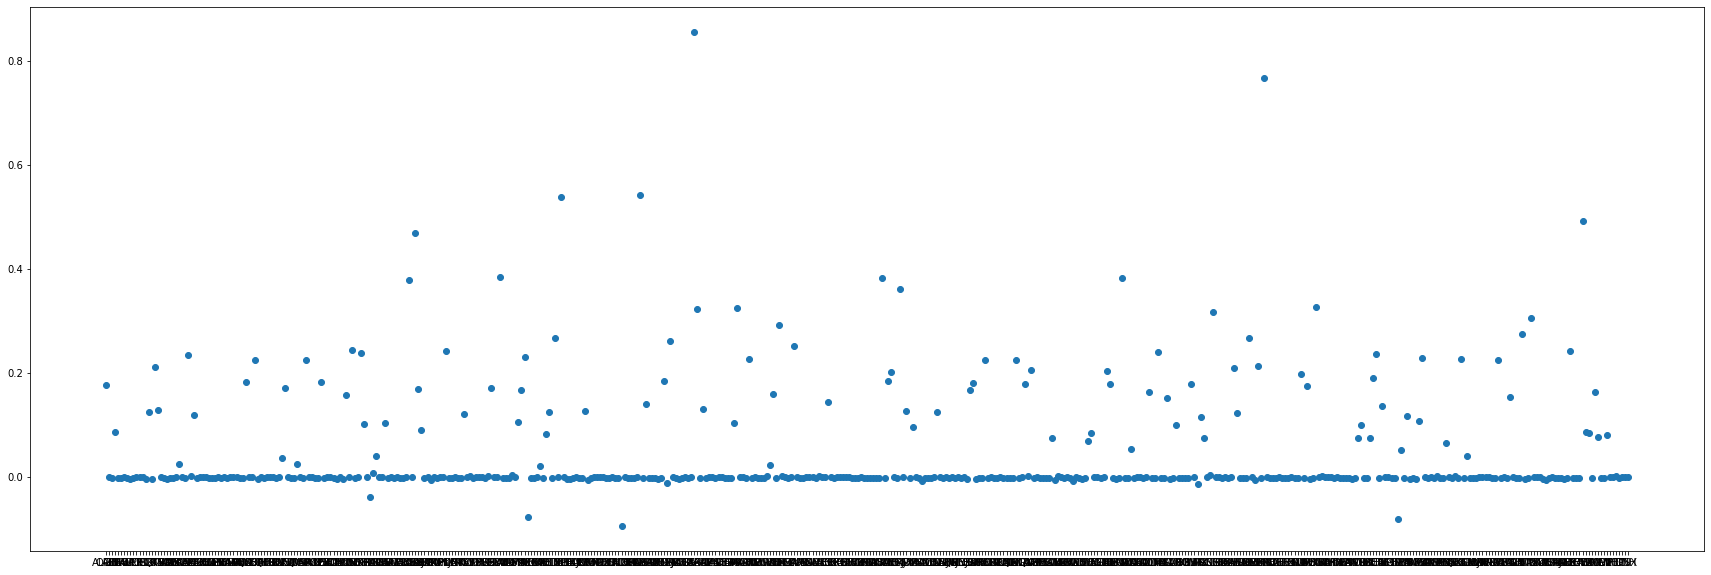

In [47]:
plt.figure(figsize=(30,10))
plt.plot(mean_returns,linestyle='None',marker='o')
plt.show()

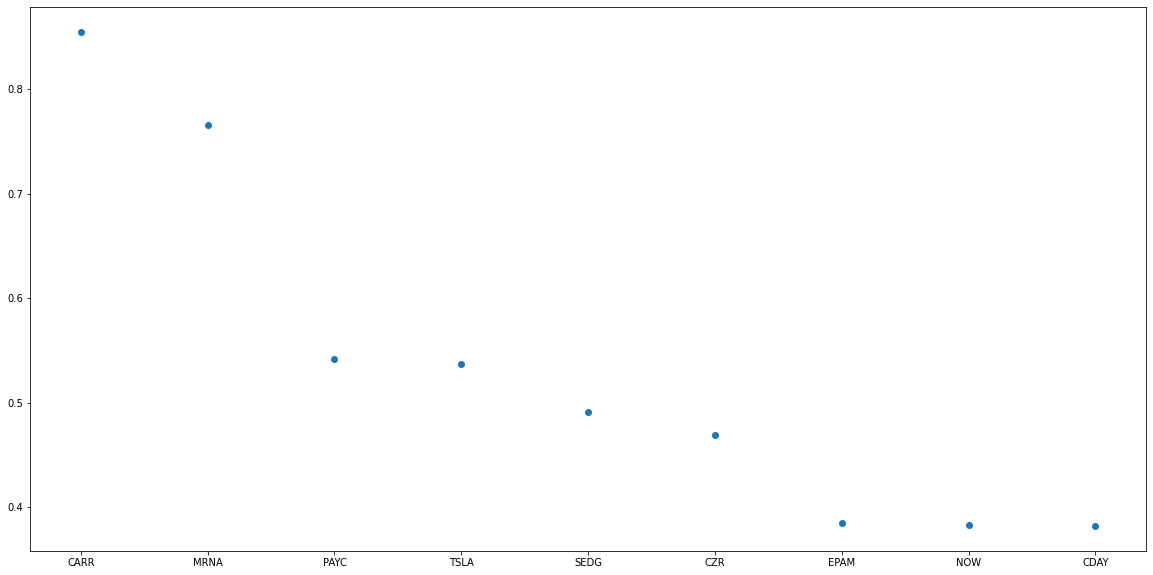

In [48]:
plt.figure(figsize=(20,10))
plt.plot(empresas_recomendadas,linestyle='None',marker='o')
plt.show()

In [49]:
lista_recomendadas=empresas_recomendadas.index
lista_recomendadas=lista_recomendadas.tolist()
lista_recomendadas

['CARR', 'MRNA', 'PAYC', 'TSLA', 'SEDG', 'CZR', 'EPAM', 'NOW', 'CDAY']

Las 9 mejpores empresas para invertir son:
  -  Carrier Global
  - Moderna,
  - Paycom
  - Otis Worldwide,
  - SolarEdge,
  - Tesla, Inc.,
  - Ceridian,
  - Caesars Entertainment,
  - ServiceNow